In [3]:
# Initialize Otter
import otter
grader = otter.Notebook("hw6.ipynb")

# Homework 6: Exploring Uber and Lyft Prices in Boston

Name: Charles McGrath

Student ID: 492530

Collaborators:


## Instructions

This homework is an _open-ended midterm project_ for our class. 

We will be using the techniques and approaches introduced in the first half of the semester, focussing on M0, M1, M2, and M6. 
> **Note:** You may do some supervised learning (as covered in M3 and M4), however, this should not be the _only_ thing(s) you do. We definitley want to see DS workflow/life-cycle (**M1**), lots of EDA (**M2**) and a discussion of ethical issues (**M6**):

* **[M0] Python for DS**
* **[M1] The DS and ML Workflows**
* **[M2] Exploratory Data Analsyis**
* [M3] Linear Regression (if applicable - depends on problem/dataset)
* [M4] Linear Classification (if applicable - depends on problem/dataset)
* [M5] Sentiment Analysis (if applicable - depends on problem/dataset)
* **[M6] Ethical Thinking for DS**

The main focus of this project is on the first three modules [M0]-[M2], as well as the ethical consderations for DS from [M6]. In particular, it will be helpful to review **Lab 2 & hw2 (Analyzing the MoMA Data)** first. Most of the things you will do in this midterm project are explained in `Lab2` and `hw2`. Then, review the other labs and hws to recap the  general workflow of our DS approaches to the various problems we have worked on so far. This will help you to be prepared for all the steps in this project, so that you do not miss anything. 

In general, you should feel free to import any package that we have previously used in class; you might want to also experiment with or use other packages. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend). 

Additionally, note that this assignment is more like a project than a typical homework and it will have a slightly different structure than the hws in the past. One of the reasons why Jupyter Notebooks are so popular in the field is because you can really treat them like notebooks to explain your findings as you discover them. In this assignment, we provide some **Problem** stubs following the EDA/DS workflow and you will need to fill in the analysis and structure as you go.

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. 

Frequently **save** your notebook!

### Collaborators and Sources
Furthermore, in addition to recording your **collaborators** on this homework, please also remember to **cite/indicate all external sources** used when finishing this assignment. 
> This includes peers, TAs, and links to online sources. 

Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

In [4]:
# collaborators and sources:
# Albert Einstein and Marie Curie
# https://developers.google.com/edu/python/strings

# your code here
answer = 'my answer'
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
# https://pandas.pydata.org/docs/reference/api/pandas.cut.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html

# https://scikit-learn.org/dev/modules/generated/sklearn.metrics.r2_score.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html


### Submission instructions
* Submit this Python notebook, including your answers in the code cells as homework submission.
* **Feel free to add as many cells as you need to** — just make sure you don't change what we gave you. 
* **Does it spark joy?** Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

## 1. Introduction

For our midterm project this semester, we'll take a look at data for numerous Lyft and Uber rides in Boston and their prices (https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma). Our goal will be to use this dataset to gain some insight about characteristics of rides and _perhaps_ find some patterns in this data.

In general, we will be following the EDA process:
1. Get the data and gain **basic understanding**
2. **Wrangle** the data
3. **Profile** the data
4. Develop questions to investigate (form a **hypotheses**)
5. Use the data to **investigate** hypothesis
6. **Summarize** results and answer questions 
7. **Critically review** our workflow and discuss ethical concerns

## 2. Getting Familiar with the Data

In this section, we will get a feel for our data and tidy it up so that we can analyize it later. 
Download the data from the source/link given above and be sure to save the data in a folder called `data` under the `utility` directory. Your final path should look like `utility/data/rideshare_kaggle.csv` -- if it doesn't **we will not be able to properly grade your assignment!**

<!-- BEGIN QUESTION -->

### Problem 1

Let's start by taking a look at our data.

**Write-up!** Describe the data, answering questions including, but not limited to, these: Where does the data come from? How was it obtained? How many examples and features does the dataset have? What kinds of features are in the dataset? What values can these features take?
> **Hint**: Consider the steps of EDA; what would you like to know about this dataset. 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('utility/data/rideshare_kaggle.csv')
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [6]:
data.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [7]:
data.shape

(693071, 57)

The data comes from price pings of Uber and Lyft rides in New York City. The dataset, which describes ride-sharing data in New York City, was simulated using historical trends rather than being real world data. The data has 693071 observations and 57 features. There are both categorical and continuous features in the dataset. The features mostly describe temporal and geographic aspects of ride shares, but there are features that also describe the weather and climate of each ride, such as temperature, wind speed, sunset time, and pressure. Some features describe necessary information, such as the ID number, timestamp, and datetime. Others contain additional information that can yield better understanding of the data, such as the apparent minimum temperature and wind gust time. Some features are continuous, such as those relating to time, date, and temperature. Other features are categorical, such as source, destination, cab type, and id number.

### Problem 2

Let's do some data wrangling. 

**Write up!** Considering your description of the dataset from [Problem 1](#Problem-1), how should we clean this data?

**Do this!** In the cells below, **explain** and perform the steps that you need to prepare this data for further analysis. Make sure that your implementations and write-ups (for processing and analysis) are presented well and effectively describe your workflow. You should add comments and markdown cells for your documentation as you see fit!  

*Grading Note: Your work will be graded for _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use concise and clear language like in a written project report.*

> **Hint**: You can use our previous labs as examples of how you might do this. 
Also, you might want to come back to this step later on, since you might encounter problems with the data once you actually analyze it. Remember, you may add as many cells (for code and text) as you need below. Here — we gave you one for free!

How should we clean the data?
First of all, we should only select the features that are necessary for our analysis. I created a new data frame with only the features that I plan on using in my analysis. Many of the features were redundant, such as those relating to temperature. I included features relating to the time of each rideshare, because this is critical information that will be useful in my data analysis. I also included a few locational and climate features for further analysis. 
Another important part of cleaning a dataset is to deal with null values, because they can cause problems when processing and analyzing the data. I removed each row and column of the data table with entirely null values (if there were any). When examing the data, I found that taxis had no price data, so I deleted every observation that had the name "Taxi". 

In [8]:
data = pd.DataFrame(data,columns=['datetime','hour','name','cab_type','source','destination','price','distance','temperature','precipIntensityMax',
                                  'visibility','timestamp','sunriseTime','sunsetTime'])
data.head()

,datetime,hour,name,cab_type,source,destination,price,distance,temperature,precipIntensityMax,visibility,timestamp,sunriseTime,sunsetTime
0,2018-12-16 09:30:07,9,Shared,Lyft,Haymarket Square,North Station,5.0,0.44,42.34,0.1276,10.000,1.544953e+09,1544962084,1544994864
1,2018-11-27 02:00:23,2,Lux,Lyft,Haymarket Square,North Station,11.0,0.44,43.58,0.1300,4.786,1.543284e+09,1543232969,1543266992
2,2018-11-28 01:00:22,1,Lyft,Lyft,Haymarket Square,North Station,7.0,0.44,38.33,0.1064,10.000,1.543367e+09,1543319437,1543353364
3,2018-11-30 04:53:02,4,Lux Black XL,Lyft,Haymarket Square,North Station,26.0,0.44,34.38,0.0000,10.000,1.543554e+09,1543492370,1543526114
4,2018-11-29 03:49:20,3,Lyft XL,Lyft,Haymarket Square,North Station,9.0,0.44,37.44,0.0001,10.000,1.543463e+09,1543405904,1543439738


In [9]:
# Drop NA values
data = data.dropna(how='all')
data = data.dropna(axis=1,how='all')
data = data[data['name']!='Taxi']

### Problem 3

**Do this!** Now that we cleaned up our data, we are ready to look into it. In this problem, we want to profile our data and explore its variables.

> **Hint**: Note that the way some data is stored does not necesarily mean that each column should correspond to a seperate variable. Feel free to define your own variables based on the input data. Looking at the dataset documentation might be helpful to figure out meaningful representations. Also note that there are no right or wrong representations here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variable representations). Again, you might want to iterate over this step again later after doing some more exploration. 

> **Hint**: Recall from Lab 2, this step usually involves computing summary statistics and basic plots _where applicable_. Try plotting some of the data (with appropriate plots; remember the lecture content - some plots introduced in there ( we did not yet use in the lab or hw) could be useful). Then, highlight a few of the more interesting ones and discuss why you thought they were interesting — for both our sakes, **please only include the most interesting ones** in your actual submission!!  Again note that there are no right or wrong features to choose here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variables to include). Just be sure to make a selection. You will not receive any credit by simply plotting everything!  

*Grading Note*: Your work will be graded for _creativity_ and _aesthetics_. Be creative in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures.* 

Once again, we have provided a _free_ cell for you to use; make as many as you need. Use text/markdown cells to describe what you are doing and what your findings are. 

During this step, I explored the data and its variables. I used the pandas 'describe' function to examine statistics such as the mean and standard deviation of each feature. I plotted histograms of the price, distance, temperature, and visibility variables. The price of cab rides ranged from around two dollars to almost one hundred dollars, but the distribution was heavily skewed to the left, meaning most rides were less than twenty dollars. The histogram of distance and temperature were closer to a normal distribution- most cab rides ranging from one to three miles. Since the data was collected during November and December, it was cold outside. Visibility is heavily skewed to the right, with most values having high visibility of around ten miles.
    Next, I plotted bar plots for the mean price per cab name and each source location. Different cab brands had extremely variable prices, with Lyft being the cheapest at around 5 dollars on average, and Lux Black SUV the most expensive, at about 32 dollars on average. Source locations also had variable price ranges, which I was surprised about. Haymarket Square in particular had a signficantly lower average price than the other locations.
    Finally, I created a line plot describing the average price over increasing distance. As one might expect, average prices increased linearly as distance increased. Because distance is such a good predictor of price, I will have to take this into account when comparing other variables with price.

In [10]:
data.describe().transpose() # Show stastics

,count,mean,std,min,25%,50%,75%,max
hour,637976.0,1.161853e+01,6.948776,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,637976.0,2.189261e+00,1.135413,2.000000e-02,1.270000e+00,2.160000e+00,2.930000e+00,7.860000e+00
temperature,637976.0,3.958241e+01,6.725500,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01
precipIntensityMax,637976.0,3.736905e-02,0.055216,0.000000e+00,0.000000e+00,4.000000e-04,9.160000e-02,1.459000e-01
visibility,637976.0,8.469180e+00,2.601828,7.170000e-01,8.432000e+00,9.880000e+00,9.996000e+00,1.000000e+01
timestamp,637976.0,1.544046e+09,689202.790112,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
sunriseTime,637976.0,1.544027e+09,691163.407229,1.543147e+09,1.543406e+09,1.543752e+09,1.544789e+09,1.545135e+09
sunsetTime,637976.0,1.544060e+09,690687.509513,1.543181e+09,1.543440e+09,1.543785e+09,1.544822e+09,1.545168e+09


In [11]:
data.select_dtypes(include='object').describe().transpose()

,count,unique,top,freq
datetime,637976,31350,2018-11-26 23:33:14,151
name,637976,12,UberXL,55096
cab_type,637976,2,Uber,330568
source,637976,12,Financial District,54197
destination,637976,12,Financial District,54192


Text(0.5, 0, 'Visibility (miles)')

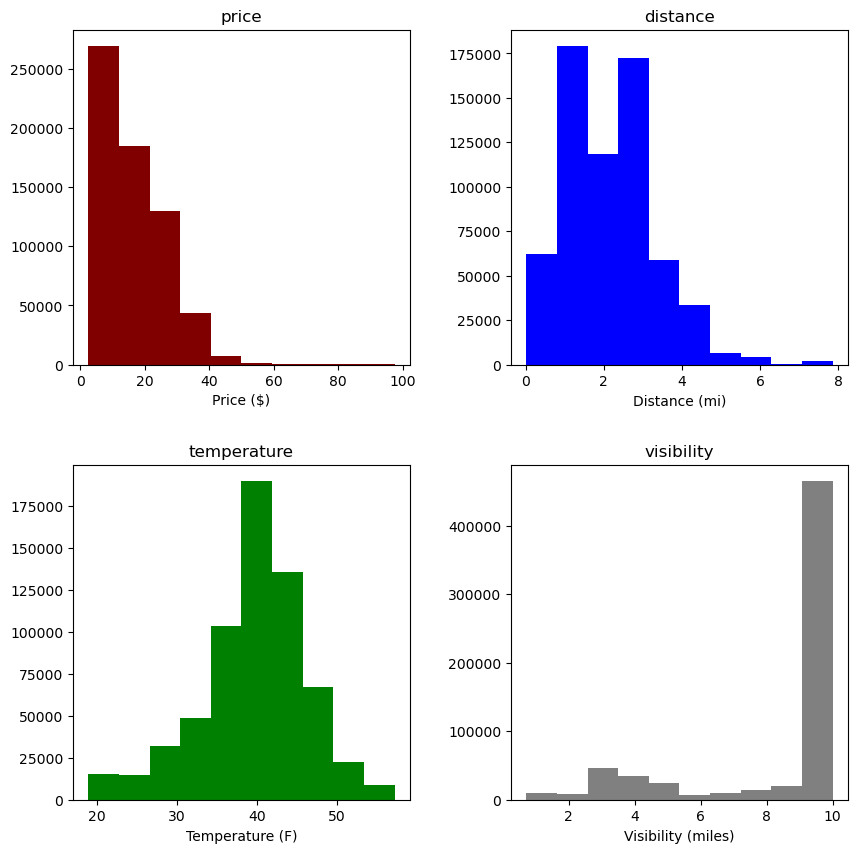

In [12]:
# Plot histograms of price, distance, temperature, and visibility

fig, axs = plt.subplots(2,2,figsize=(10,10)) # Define subplots
ax1, ax2, ax3, ax4 = axs.flatten() # Flatten the axes
data.hist(column='price',grid=False,bins=10,ax=ax1,color='maroon') # Plot histogram
ax1.set_xlabel('Price ($)') # Set x label

data.hist(column='distance',grid=False,bins=10,ax=ax2,color='blue')
ax2.set_xlabel('Distance (mi)')

data.hist(column='temperature',grid=False,bins=10,ax=ax3,color='green')
ax3.set_xlabel('Temperature (F)')

data.hist(column='visibility',grid=False,bins=10,ax=ax4,color='gray')
ax4.set_xlabel('Visibility (miles)')

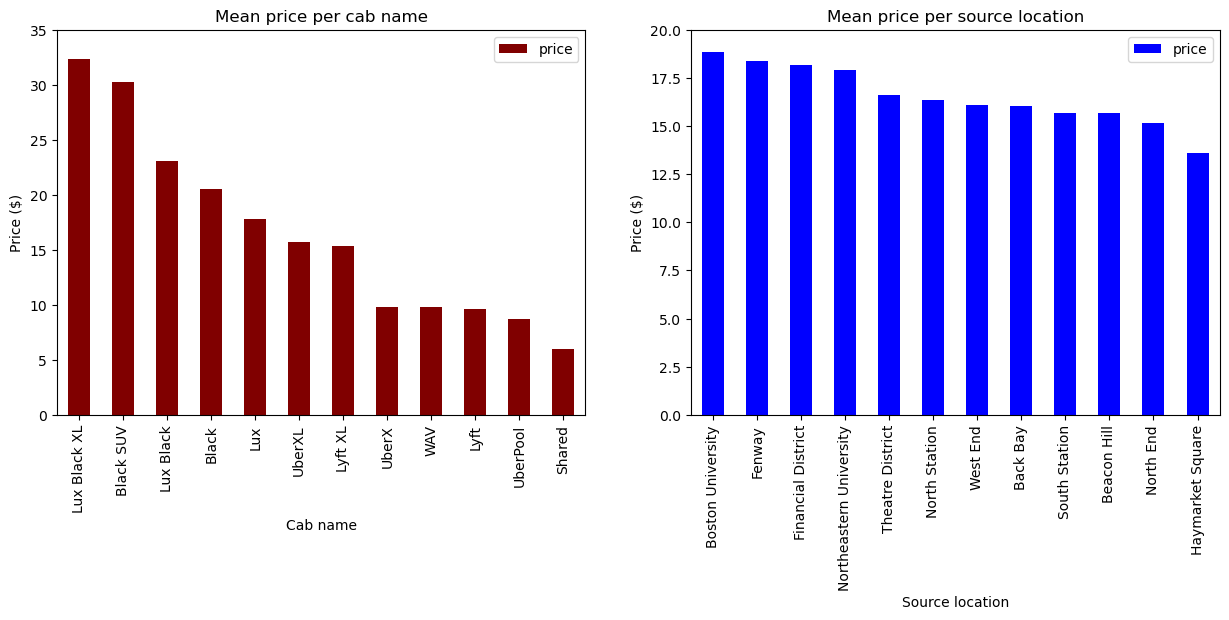

In [13]:
# Plot bar plots of the mean price for each cab name, and the mean price for each source pickup location

import matplotlib.pyplot as plt
plt.figure(figsize=(15,5)) # Define figure size
plt.subplots_adjust(hspace=0.8) # Adjust width between figures
plt.subplot(121) # Create subplot
name_price = pd.DataFrame(data.groupby('name')['price'].mean()) # Calculate the mean price for each cab name
name_price_sorted = name_price.sort_values(by='price', ascending=False) # Sort values descending
name_price_sorted.plot.bar(ax=plt.gca(),color='maroon') # Plot the bar plot
plt.title('Mean price per cab name')
plt.xlabel('Cab name')
plt.ylabel('Price ($)')
plt.ylim(0,35)

plt.subplot(122)
loc_grouped = pd.DataFrame(data.groupby('source')['price'].mean())
data_sorted = loc_grouped.sort_values(by='price', ascending=False)
data_sorted.plot.bar(ax=plt.gca(),color='blue')
plt.title('Mean price per source location')
plt.xlabel('Source location')
plt.ylabel('Price ($)')
plt.ylim(0,20)
plt.show()

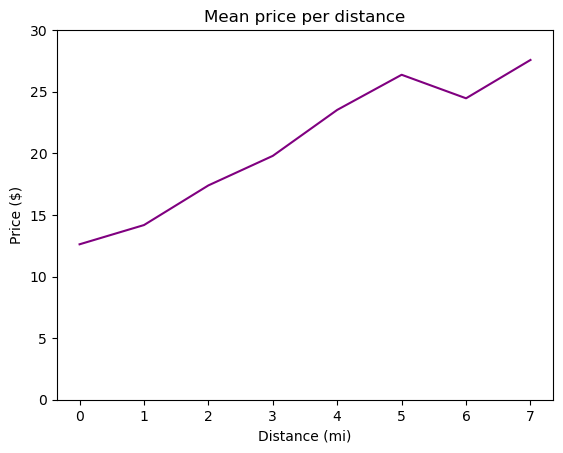

In [14]:
# Line plot of the mean price for each distance in miles

bins = list(range(0,10)) # Assign bins from 1 to 10 
bin_labels = list(range(0,9))
cut_dist = pd.cut(data.distance,bins=bins,labels=bin_labels) # Cut the distance feature into ten bins
distance_grouped = data.groupby(cut_dist)['price'].mean() # Calculate the mean price for each mile
distance_grouped.plot.line(ax=plt.gca(),color='purple') # Plot the line
plt.xlabel('Distance (mi)')
plt.ylabel('Price ($)')
plt.title('Mean price per distance')
plt.ylim(0,30)
plt.show()

## 3. Asking the Hard Questions

By now we should know all of the ins and outs about this dataset (right?). Let's dive a little deeper into it and see if we can find anything interesting.

### Problem 4

As you worked through the initial data processing and understanding phase, did anything catch your interest? Let's formulate some questions and hypotheses that you could explore in depth.

**Write-up!** Formulate and describe a question you have/want to investigate. Then, formulate and describe a hypothesis that can (possibly) answer it. What inspired your idea (provide specifics from [the last section](#2.-Getting-Familiar-with-the-Data), if any)? How can you use the data to support or reject your hypothesis?

> **Hint**: Your question/hypothesis might be something that you are personally interested in or something that you think might lead to a product or service for users/customers. You might want to think about something that could help others in making decisions, etc.

*Grading Note: Your work will be graded for _creativity_. Be creative in the questions you ask/hypothesis you pose.* 

I want to examine what factors influence the price of a ride. Specifically, how the price of a ride varies based on changes in distance, location, time of day, and weather. From the last step, I am fairly certain that higher distances will increase prices, but I want to quantify this relationship using regression analyses. I also want to know more about the effect of more subtle factors. My hypothesis is that the time of day is the most relevant factor, and that during rush hour, the prices will be the highest. Intuitively, it makes sense that when there is much more traffic, cabs will be in greater demand and prices will be higher. If my hypothesis is proved correct, this could help consumers save money by choosing intelligently when and where they want to go. To test my hypothesis, I will calculate statistics for location, time, and weather features. Specifically, I will calculate the mean price for low, medium, and high values of each variable.

### Problem 5

**Do this!** Let's explore your hypothesis. Find evidence from the data that supports or refutes your hypothesis and present it — recall that as a data scientist, one of your goals is to discover and communicate your results to your audience, _me_. The more thorough your analysis, the better!

> **Hint**: Even though we focus on EDA here, you may include some predictive modeling here as well. 

Here's yet another _free_ cell; use as many as you need.

In [15]:
from IPython.display import display, HTML

In [16]:
# Mean prices during the night and day

night = (data['timestamp']>data['sunsetTime'])|(data['timestamp']<data['sunriseTime'])
night_df = data[night]
day_df = data[~night]
data_copy = data.copy()
data_copy['Day or night']= night
data_copy['Distances'] = pd.cut(data_copy.distance,bins=[0,2,5,8],
                                   labels=['short','medium','long'])

distance_bins = pd.cut(data.distance,bins=[0,2,5,8],labels=['short','medium','long'])
distance_grouped = pd.DataFrame(data.groupby([distance_bins,night])['price'].mean())
distance_grouped.columns=['Mean Price']
distance_grouped

Mean Price
distance                  
short    False   13.755247
         True    13.747372
medium   False   18.768942
         True    18.807698
long     False   26.317707
         True    26.320306

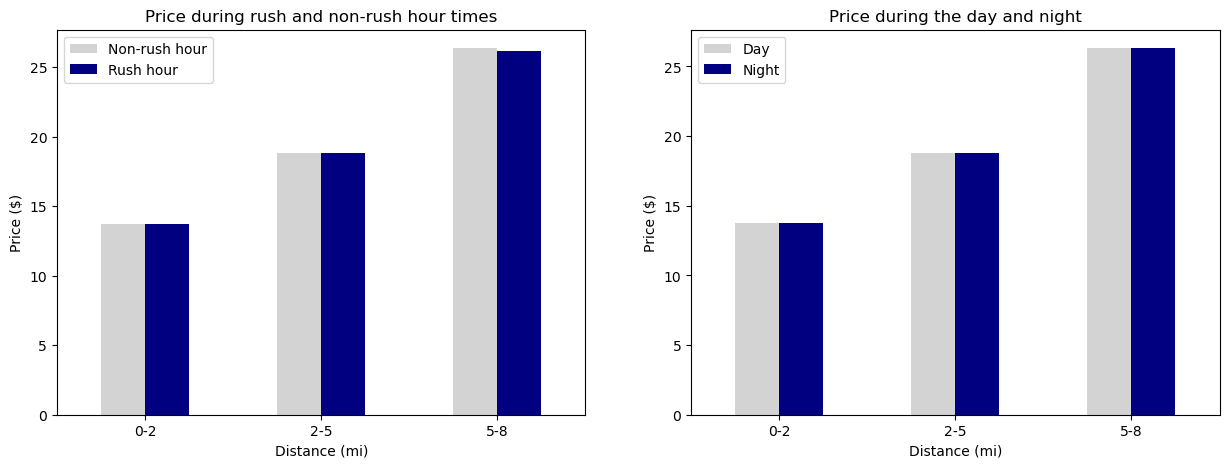

In [17]:
# Comparing price by time of day (rush hour and during the night)

fig, axs = plt.subplots(1,2,figsize=(15,5)) # Define subplots
plt.subplot(121)
rush_hour = ((data['hour']>=7)&(data['hour']<=9)) | ((data['hour']>=16)&(data['hour']<=18)) # Select times during rush hour (7-9AM, 2-4PM)
distance_bins = pd.cut(data.distance,bins=[0,2,5,8],labels=['0-2','2-5','5-8']) # Divide distances into three bins
rush_hour_dist = data.groupby([distance_bins,rush_hour])['price'].mean() # Group times by distance bins
rush_hour_unstack = rush_hour_dist.unstack() 
colors1 = ['lightgray','navy']
rush_hour_unstack.plot.bar(ax=axs[0],color=colors1) # Plot the bar graph
plt.legend(['Non-rush hour','Rush hour'])
plt.xlabel('Distance (mi)')
plt.ylabel('Price ($)')
plt.title('Price during rush and non-rush hour times')
plt.xticks(rotation=0)

plt.subplot(122)
night = (data['timestamp']>data['sunsetTime'])|(data['timestamp']<data['sunriseTime']) # Select times before sunrise and after sunset and call this night
night_grouped = data.groupby([distance_bins,night])['price'].mean() # Group the times by distance bins
night_grouped = night_grouped.unstack() 
night_grouped.plot.bar(ax=axs[1],color=colors1) # Plot the bar graph
plt.legend(['Day','Night'])
plt.xlabel('Distance (mi)')
plt.ylabel('Price ($)')
plt.title('Price during the day and night')
plt.xticks(rotation=0)
plt.show()


display(HTML(<'a id='regression'></a>'))
# Regression analysis below

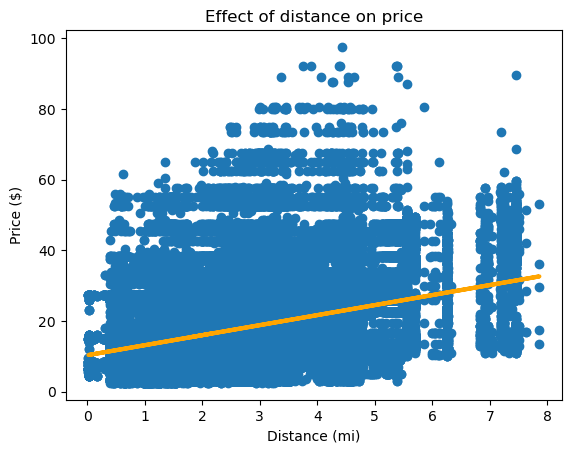

In [18]:
# Create linear regression model to analyze the effect of distance on price

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

dist_re = data.distance.to_frame().values.reshape(-1,1) # Reshape distance data
price_re = data.price.to_frame().values.reshape(-1,1)
dist_df = pd.DataFrame(dist_re) # Convert to pandas dataframe
price_df = pd.DataFrame(price_re)

X_train, X_test, y_train, y_test = train_test_split(dist_df, data.price, test_size=0.2, random_state=10) # Split the training and testing data
model = LinearRegression() # Create linear regression model
w = model.fit(X_train,y_train) # Fit the model using training data
y_pred = w.predict(X_train) # Predict y values from training data

plt.scatter(X_train,y_train) # Create scatter plot of x and y training data
plt.plot(X_train,y_pred,color='orange',linewidth=3) # Plot the regression line
plt.title('Effect of distance on price')
plt.xlabel('Distance (mi)')
plt.ylabel('Price ($)')
plt.show()

In [19]:
X_train

,0
510183,1.83
32472,3.79
471532,2.72
34332,1.80
387715,0.62
...,...
533660,4.75
105595,4.48
617841,3.31
443712,2.25


In [385]:
# Calculate RMSE and R squared from ground truth and y predictions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_prediction = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_prediction))
print('RMSE:',rmse)
r_squared = r2_score(y_test,y_prediction)
print('R2:',r_squared)

RMSE: 8.755510004949706
R2: 0.11893805845264582


In [392]:
# Calculate the price per mile of each source location

source_distance = data.groupby('source')['distance'].mean() # Find the mean distance for each source location
source_price = data.groupby('source')['price'].mean() # Find the mean price for each source location
prices = pd.DataFrame([source_distance,source_price,source_price/source_distance]).T # Create dataframe and reshape it
prices.columns=['Distance','Price','Price per mile']
#print(np.max(prices['Price per mile']))
prices


,Distance,Price,Price per mile
source,,,
Back Bay,1.981815,16.047394,8.097322
Beacon Hill,2.035296,15.664030,7.696191
Boston University,3.051155,18.853034,6.178982
Fenway,2.811519,18.379491,6.537210
Financial District,2.708317,18.181372,6.713164
Haymarket Square,1.120289,13.578114,12.120192
North End,1.610733,15.153373,9.407749
North Station,2.218849,16.364006,7.374999
Northeastern University,2.722848,17.901124,6.574411


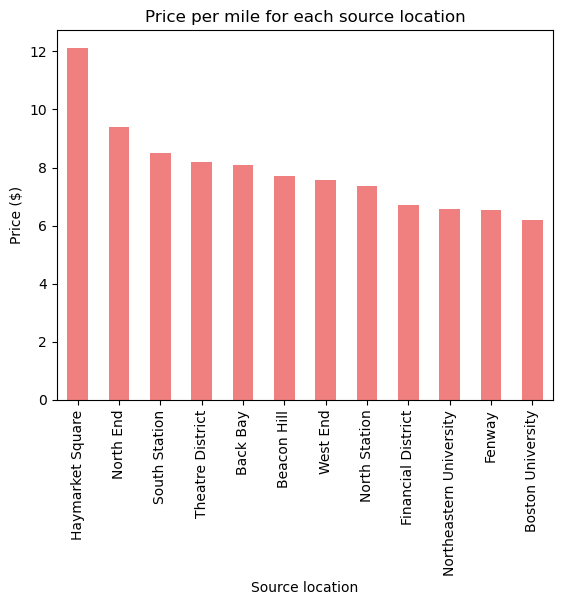

In [397]:
# Plot the average price per mile 

data_sorted = prices.sort_values(by='Price per mile', ascending=False)
data_sorted['Price per mile'].plot.bar(color='lightcoral')
plt.xlabel('Source location')
plt.ylabel('Price ($)')
plt.title('Price per mile for each source location')
plt.show()

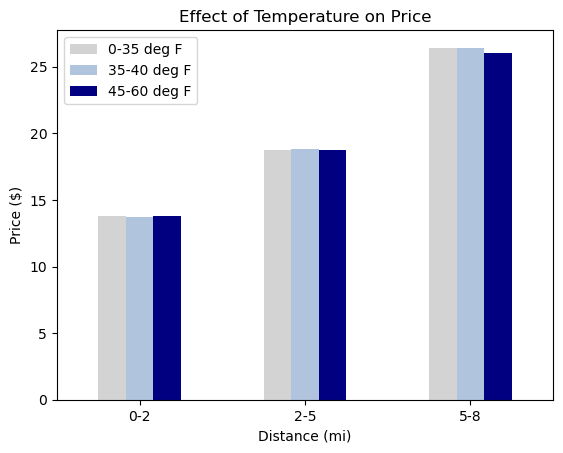

In [398]:
# Examine how varying temperature affects price, controlling for distance
data_copy = data.copy()
data_copy['distanceBin'] = pd.cut(data_copy.distance,bins=[0,2,5,8], # Divide data into groups of varying distance
                                   labels=['0-2','2-5','5-8'])
data_copy['tempBin']=pd.cut(data_copy.temperature,bins=[0,35,45,60], # Divide data into groups of varying temperature
                                   labels=['low','medium','high'])
temp_grouped=data_copy.groupby(['distanceBin','tempBin'])['price'].mean() # Group the data based on temperature and distance
temp_grouped_df = pd.DataFrame(temp_grouped)

temp_grouped_df = temp_grouped.unstack()  # Unstack the data
colors = ['lightgray','lightsteelblue','navy'] # Define color scheme
temp_grouped_df.plot.bar(color=colors) # Plot the bar graph
plt.legend(['0-35 deg F','35-40 deg F','45-60 deg F'])
plt.title('Effect of Temperature on Price')
plt.xlabel('Distance (mi)')
plt.ylabel('Price ($)')
plt.xticks(rotation=0)
plt.show()

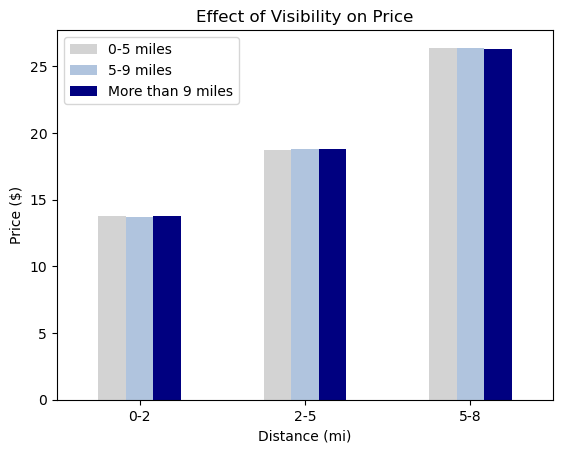

In [399]:
# Examine effect of visibility on price, controlling for distance

data_copy['Visibility bin']=pd.cut(data_copy.visibility,bins=[0,5,9,10])
vis_grouped=data_copy.groupby(['distanceBin','Visibility bin'])['price'].mean()
vis_grouped_df = pd.DataFrame(vis_grouped)

vis_grouped_df.columns=['Mean Price']
vis_grouped_df = vis_grouped.unstack() # Rearange data 
vis_grouped_df.plot.bar(color=colors) # Create bar plot
plt.title('Effect of Visibility on Price')
plt.xlabel('Distance (mi)')
plt.ylabel('Price ($)')
plt.legend(['0-5 miles','5-9 miles','More than 9 miles'])
plt.xticks(rotation=0)
plt.show()

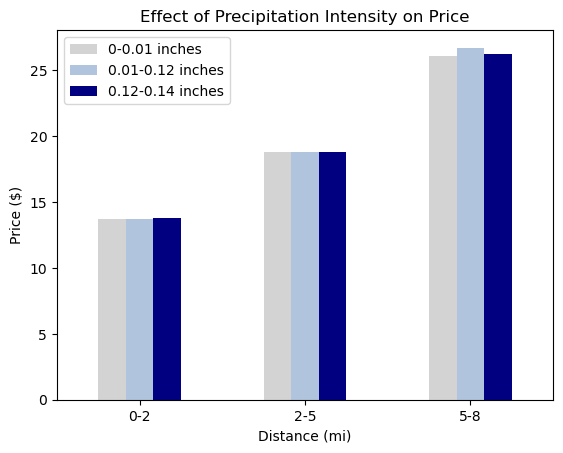

In [400]:
# Examine the effect of precipitation on price, controlling for distance

data_copy['Precipitation bin']=pd.cut(data_copy.precipIntensityMax,bins=[0,0.01,0.12,0.14]) # Very few values between 0.01 and 0.12 inches
precip_grouped=data_copy.groupby(['distanceBin','Precipitation bin'])['price'].mean()
precip_grouped_df = pd.DataFrame(pre_grouped)

pre_grouped_df.columns=['Mean Price']
precip_grouped_df = precip_grouped.unstack()
precip_grouped_df.plot.bar(color=colors)
plt.title('Effect of Precipitation Intensity on Price')
plt.xlabel('Distance (mi)')
plt.ylabel('Price ($)')
plt.legend(['0-0.01 inches','0.01-0.12 inches','0.12-0.14 inches'])
plt.xticks(rotation=0)
plt.show()

### Problem 6

**Write up!** Did you find anything interesting in [Problem 5](#Problem-5)? If you did, tell me about it. If you don't think you found anything interesting, keep looking. 

> **Hint**: Provide links to key figures in your discussion. See [this StackOverflow question](https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown) for details.

I tested my hypothesis by examining the effect of four main factors on price: time of day, distance, location, and weather. I found that the time of day did not have a significant effect on price, even when separating times during rush hour and during the night (I expected surge pricing during these times). Thus, my hypothesis was rejected.

I used a linear regression model to predict the price using distance data. The regression model showed a positive linear relationship between distance and price, shown by the [scatter plot](#regression). The R squared value, measuring the percentage of variation in price explained by the dependent variable, is low (around 0.11). This makes sense to me, because there are many other factors that go into pricing other than distance.  

Knowing that distance had a postive effect on price, I wanted to investigate if these effects were spread evenly over the city of Boston. I calculated the mean price and distance for each source location, and then calculated the mean price per mile. I found that Haymarket square has a significantly higher average price per mile than any other station, shown by this [plot](#location_plot). It also has the lowest average distance and average price. Haymarket square is in the center of Boston, which is an indication that it might have higher ride costs and smaller average distances. On the other hand, Fenway Park and Boston University are further from downtown, and have the lowest two average prices per mile. This reveals that location affects both distance and price. However, it makes sense that the price per mile would be larger for smaller distances, meaning that location alone does not predict the change in price. 

Overall, weather does not seem to have a large effect on price, even when controlling for distance. The differences between high temperature and low temperature were miniscule on [average](#temperature), and the same goes for visibility and precipitation intensity. Overall, the weather does not seem to be a major predictor for the price of a ride. 

### Problem 7
One last step that we shouldn't skip is reviewing both our data analysis approach and also the data acquisition method. 

**Write up!** Are there any shortcomings and/or **ethical issues** related to the way you used this data or formed your conclusions?
* Who are the stakeholders?
* How could someone other than yourself be impacted by any ethical issues arising from your analysis/work/product?
* Can you propose a way to resolve the issue(s)?

The stakeholders are everyone who uses and are affected by usage of this data. This can include cab riders, data scientists, and Uber executives. There are several ethical issues relating to the way I used this data. I analyzed the effect of location on price, and found that Haymarket Square had shorter rides overall that were more expensive. This exposes the schedules and habits of people who live in that area. As well, I used temporal data to determine that surge pricing is not a major issue. While this does not expose any personal information, it could be used by companies to actually increase prices during these times. I did not use specific personal details and did not violate privacy of users, but I did expose the aggregate habits of users, which can be used by companies to increase their revenue, which comes at a cost to users. I don't think this issue can be resolved easily. I was not actually using personal information, and I can't get the approval of all rideshare users to use their data. However, I do think that personal information such as age, gender, and phone numbers should not be included in any dataset, and neither should unique user ids (which are in this dataset), because they can be traced back to individuals. 

Let's conclude with thinking about imporvements for the future! 

**Write up!** There are often times where the data you need doesn't exist (yet) and you need to go collect it. Based on your analysis of the data set, which features were informative and which weren't? What information that was missing from this dataset do you think would be helpful to have for next time?

There were a few features that were especially informative- namely price, distance, source/destination location, cab type, and timestamp. The data relating to weather wasn't especially informative, because it didn't reveal any notable patterns with key variables such as price. There was some key information missing, such as rides data throughout the year or across different years (the dataset only included November and December of 2018). Ride patterns might be different in the summer, for example. In addition, the time length of the ride and the day of the week would be helpful to have.

And that's it! Remember to review your work and make sure it is well presented and organized. Not everyting you coded up needs to remain in your submission. **[Does [this cell] spark joy?](https://i.kinja-img.com/gawker-media/image/upload/s--iW_3HGbT--/c_scale,dpr_2.0,f_auto,fl_progressive,q_80,w_800/oruf4oavtj5vpmvaquew.jpg)** You are always trying to communicate your findings to somebody, _maybe even yourself_. 

> **Final Grading Note/Reminder**: Your work will be graded for _creativity_, _aesthetics_, _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report. Be creative in the questions you ask/hypothesis you pose as well as in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures. 

### Submission instructions
* Check to make sure that your code runs without error on a fresh kernel. Within jupyter, **Kernel -> Restart & Run All**. 
* **Save your notebook!**
* Submit this Python notebook, including your answers in the code cells as homework submission. Be sure to add your partner to the submission as well.
* After submitting, navigate to the **code tab** to view your submission. Verify that all your write-ups, markdown cells, and visualizations appear correctly on Gradescope. This is the **exact** view the graders will see when grading your work, so make sure that everything looks as expected.

In [389]:
grader.check("hw6")

hw6 results: All test cases passed!

<!-- END QUESTION -->

